<a href="https://colab.research.google.com/github/mi622/EDP/blob/main/MetodoJacobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MÉTODO DE JACOBI**

A continucación se presentará un programa que implemente la técnica iterativa de Jacobi en un cuaderno de Jupyter Notebook (Google Colab).

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def jacobi(A, b, x0=None, tol=1e-10, max_iter=100):
    """
    Método de Jacobi para resolver Ax = b.

    Parámetros:
    -----------
    A : numpy.ndarray
        Matriz de coeficientes (n x n)
    b : numpy.ndarray
        Vector de términos independientes (n)
    x0 : numpy.ndarray, opcional
        Vector inicial de aproximaciones (default = ceros)
    tol : float, opcional
        Tolerancia para el criterio de parada
    max_iter : int, opcional
        Número máximo de iteraciones permitidas

    Retorna:
    --------
    x : numpy.ndarray
        Solución aproximada
    iteraciones : int
        Número de iteraciones realizadas
    historial : list
        Lista de vectores con las aproximaciones sucesivas
    errores : list
        Lista de errores en cada iteración
    """

    n = len(b)
    if x0 is None:
        x0 = np.zeros(n)

    x = x0.copy()
    historial = [x0.copy()]
    errores = [np.inf]   # error inicial "infinito"

    for k in range(max_iter):
        x_new = np.zeros_like(x)

        # Fórmula de Jacobi
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]

        # Calcular error como norma infinito
        error = np.linalg.norm(x_new - x, ord=np.inf)

        historial.append(x_new.copy())
        errores.append(error)

        # Criterio de parada
        if error < tol:
            return x_new, k+1, historial, errores

        x = x_new

    return x, max_iter, historial, errores


Utilizando el ejemplo visto en clase:
$$
\begin{aligned}
4x_1 - x_2 - x_3 + 0x_4 &= 0 \\
-x_1 + 4x_2 + 0x_3 - x_4 &= \frac{2}{3} \\
-x_1 + 0x_2 + 4x_3 - x_4 &= \frac{8}{9} \\
0x_1 - x_2 - x_3 +4x_4 &= \frac{14}{9}
\end{aligned}
$$

In [ ]:

A = np.array([[ 4, -1, -1,  0],
              [-1,  4,  0, -1],
              [-1,  0,  4, -1],
              [ 0, -1, -1,  4]], dtype=float)

b = np.array([0, 2/3, 8/9, 14/9], dtype=float)

# Vector inicial
x0 = np.zeros(len(b))

# Ejecutar Jacobi
x_aprox, it, historial, errores = jacobi(A, b, x0, tol=1e-8, max_iter=100)


In [ ]:
iteraciones = list(range(len(historial)))
tabla = pd.DataFrame(historial, columns=[f"x{i+1}" for i in range(len(b))])
tabla["Error"] = errores
tabla.insert(0, "Iteración", iteraciones)

print("\n=== TABLA DE RESULTADOS - MÉTODO DE JACOBI ===\n")
print(tabla.to_string(index=False))

print("\n=== SOLUCIÓN FINAL ===")
print("Aproximación:", x_aprox)
print("Iteraciones realizadas:", it)



=== TABLA DE RESULTADOS - MÉTODO DE JACOBI ===

 Iteración       x1       x2       x3       x4        Error
         0 0.000000 0.000000 0.000000 0.000000          inf
         1 0.000000 0.166667 0.222222 0.388889 3.888889e-01
         2 0.097222 0.263889 0.319444 0.486111 9.722222e-02
         3 0.145833 0.312500 0.368056 0.534722 4.861111e-02
         4 0.170139 0.336806 0.392361 0.559028 2.430556e-02
         5 0.182292 0.348958 0.404514 0.571181 1.215278e-02
         6 0.188368 0.355035 0.410590 0.577257 6.076389e-03
         7 0.191406 0.358073 0.413628 0.580295 3.038194e-03
         8 0.192925 0.359592 0.415148 0.581814 1.519097e-03
         9 0.193685 0.360352 0.415907 0.582574 7.595486e-04
        10 0.194065 0.360731 0.416287 0.582954 3.797743e-04
        11 0.194255 0.360921 0.416477 0.583143 1.898872e-04
        12 0.194350 0.361016 0.416572 0.583238 9.494358e-05
        13 0.194397 0.361064 0.416619 0.583286 4.747179e-05
        14 0.194421 0.361087 0.416643 0.583310 2.37

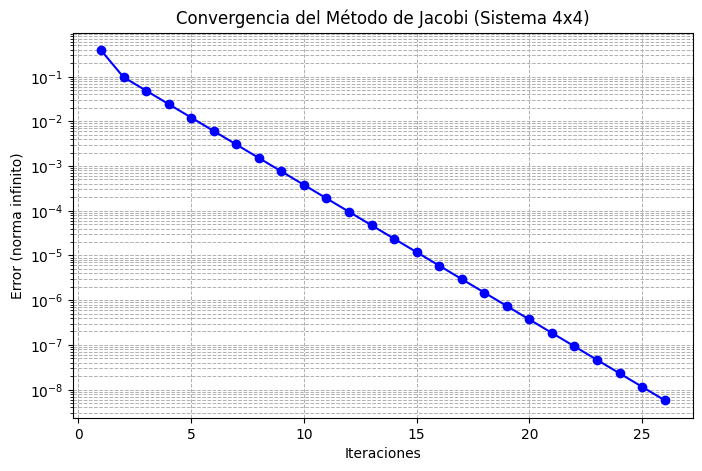

In [ ]:
# GRÁFICO DE CONVERGENCIA
# ==========================================================
plt.figure(figsize=(8,5))
plt.plot(iteraciones, errores, marker='o', linestyle='-', color='b')
plt.yscale("log")  # escala logarítmica para ver mejor la convergencia
plt.xlabel("Iteraciones")
plt.ylabel("Error (norma infinito)")
plt.title("Convergencia del Método de Jacobi (Sistema 4x4)")
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.show()

In [3]:
# Define the grid size and parameters for the PDE
nx, ny = 9, 9  # Number of grid points in x and y directions
dx = 2.0 / (nx - 1)
dy = 2.0 / (ny - 1)

# Initialize the solution matrix U with boundary conditions
U = np.zeros((ny, nx))

# Set boundary conditions (example: Dirichlet boundary conditions)
U[0, :] = 0  # Bottom boundary
U[-1, :] = 1  # Top boundary
U[:, 0] = np.linspace(0, 1, ny)  # Left boundary (linear interpolation)
U[:, -1] = np.linspace(0, 1, ny) # Right boundary (linear interpolation)

# Implement the Jacobi method for solving the Laplace equation
def solve_laplace_jacobi(U, max_iter=1000, tol=1e-6):
    U_new = U.copy()
    errors = []
    for k in range(max_iter):
        U = U_new.copy()
        # Apply Jacobi iteration
        for i in range(1, ny - 1):
            for j in range(1, nx - 1):
                U_new[i, j] = 0.25 * (U[i+1, j] + U[i-1, j] + U[i, j+1] + U[i, j-1])

        # Calculate error (using the infinite norm)
        error = np.linalg.norm(U_new - U, ord=np.inf)
        errors.append(error)

        # Check for convergence
        if error < tol:
            print(f"Converged after {k+1} iterations")
            return U_new, errors

    print(f"Did not converge after {max_iter} iterations")
    return U_new, errors

# Solve the Laplace equation
U, errors = solve_laplace_jacobi(U.copy())

# Now U is defined and can be used for plotting

Converged after 161 iterations


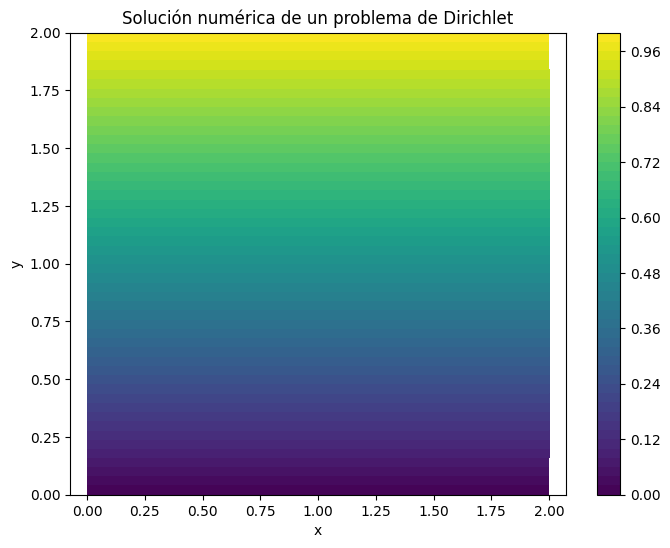

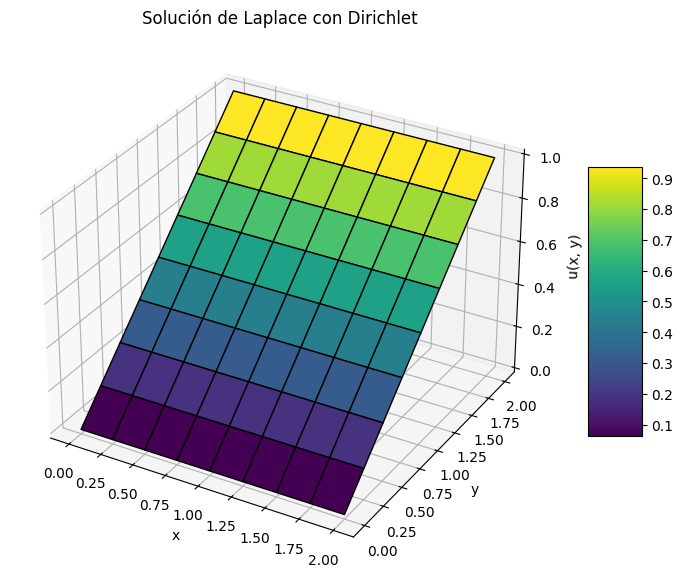

In [4]:
# Definir los puntos de la cuadrícula.
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)

# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=50, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de Laplace con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()